In [1]:
# 메인 배달 freq 데이터와 휴일 데이터 결합해서,
# 요일별 배달량 차팅해보기
# 휴일/평일 배달량 차팅해보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='AppleGothic')

In [2]:
delivery_frequency = pd.read_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/cleaned_data/시간지역별배달주문건수.csv', index_col=0)
delivery_frequency

FileNotFoundError: [Errno 2] No such file or directory: '/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/cleaned_data/시간지역별배달주문건수.csv'

In [6]:
holiday = pd.read_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/rawdata/holiday/holiday.csv', index_col=0)
holiday

,date,day_name,holiday
1,2019-01-01,1월1일,Y
2,2019-02-04,설날,Y
3,2019-02-05,설날,Y
4,2019-02-06,설날,Y
5,2019-03-01,삼일절,Y
6,2019-05-05,어린이날,Y
7,2019-05-06,대체공휴일,Y
8,2019-05-12,부처님오신날,Y
9,2019-06-06,현충일,Y
10,2019-08-15,광복절,Y


In [7]:
delivery_frequency.dtypes

날짜      object
시간대      int64
광역시도    object
시군구     object
읍면동     object
배달건수     int64
요일      object
dtype: object

In [8]:
holiday.dtypes

date        object
day_name    object
holiday     object
dtype: object

In [36]:
# 데이터 두 개 걍 합쳐버려야겠다
df = pd.merge(delivery_frequency, holiday, how='left', left_on='날짜', right_on = 'date')
df[df['날짜']=='2019-12-25']

,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,date,day_name,holiday
404425,2019-12-25,0,경기도,고양시 덕양구,삼송동,3,수,2019-12-25,기독탄신일,Y
404426,2019-12-25,0,경기도,고양시 덕양구,행신동,21,수,2019-12-25,기독탄신일,Y
404427,2019-12-25,0,경기도,고양시 덕양구,화정동,36,수,2019-12-25,기독탄신일,Y
404428,2019-12-25,0,경기도,고양시 일산동구,마두동,3,수,2019-12-25,기독탄신일,Y
404429,2019-12-25,0,경기도,고양시 일산동구,백석동,17,수,2019-12-25,기독탄신일,Y
...,...,...,...,...,...,...,...,...,...,...
407790,2019-12-25,23,충청북도,제천시,영천동,1,수,2019-12-25,기독탄신일,Y
407791,2019-12-25,23,충청북도,제천시,장락동,3,수,2019-12-25,기독탄신일,Y
407792,2019-12-25,23,충청북도,제천시,천남동,2,수,2019-12-25,기독탄신일,Y
407793,2019-12-25,23,충청북도,제천시,청전동,6,수,2019-12-25,기독탄신일,Y


In [37]:
# holiday값이 있는 애들만 확인하기
df[df['day_name'].isnull()==False]

,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,date,day_name,holiday
32640,2019-08-15,0,강원도,속초시,교동,1,목,2019-08-15,광복절,Y
32641,2019-08-15,0,경기도,고양시 덕양구,성사동,1,목,2019-08-15,광복절,Y
32642,2019-08-15,0,경기도,고양시 덕양구,행신동,15,목,2019-08-15,광복절,Y
32643,2019-08-15,0,경기도,고양시 덕양구,화정동,11,목,2019-08-15,광복절,Y
32644,2019-08-15,0,경기도,고양시 일산동구,마두동,1,목,2019-08-15,광복절,Y
...,...,...,...,...,...,...,...,...,...,...
2343769,2021-08-16,23,충청남도,천안시 서북구,쌍용동,5,월,2021-08-16,대체공휴일,Y
2343770,2021-08-16,23,충청북도,제천시,신백동,3,월,2021-08-16,대체공휴일,Y
2343771,2021-08-16,23,충청북도,제천시,천남동,3,월,2021-08-16,대체공휴일,Y
2343772,2021-08-16,23,충청북도,제천시,청전동,5,월,2021-08-16,대체공휴일,Y


In [38]:
df.info

<bound method DataFrame.info of                  날짜  시간대  광역시도       시군구  읍면동  배달건수 요일 date day_name holiday
0        2019-08-01    0   강원도       속초시   교동     1  목  NaN      NaN     NaN
1        2019-08-01    0   경기도  고양시 일산동구  마두동     4  목  NaN      NaN     NaN
2        2019-08-01    0   경기도  고양시 일산동구  백석동    28  목  NaN      NaN     NaN
3        2019-08-01    0   경기도  고양시 일산동구  식사동     3  목  NaN      NaN     NaN
4        2019-08-01    0   경기도  고양시 일산동구  장항동     4  목  NaN      NaN     NaN
...             ...  ...   ...       ...  ...   ... ..  ...      ...     ...
2382976  2021-08-31   23  충청남도   천안시 서북구  쌍용동     6  화  NaN      NaN     NaN
2382977  2021-08-31   23  충청북도       제천시  신백동     6  화  NaN      NaN     NaN
2382978  2021-08-31   23  충청북도       제천시  신월동     2  화  NaN      NaN     NaN
2382979  2021-08-31   23  충청북도       제천시  천남동     1  화  NaN      NaN     NaN
2382980  2021-08-31   23  충청북도       제천시  하소동     4  화  NaN      NaN     NaN

[2382981 rows x 10 columns]>

In [39]:
# '날짜'와 중복되는 'date'컬럼 삭제
df.drop(['date'], axis=1, inplace = True)
df

,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,day_name,holiday
0,2019-08-01,0,강원도,속초시,교동,1,목,NaN,NaN
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4,목,NaN,NaN
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28,목,NaN,NaN
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3,목,NaN,NaN
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4,목,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6,화,NaN,NaN
2382977,2021-08-31,23,충청북도,제천시,신백동,6,화,NaN,NaN
2382978,2021-08-31,23,충청북도,제천시,신월동,2,화,NaN,NaN
2382979,2021-08-31,23,충청북도,제천시,천남동,1,화,NaN,NaN


In [40]:
# 휴일 결합한 파일 저장해두기
df.to_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/rawdata/holiday/freq_with_holiday.csv')

In [41]:
# 광역시도 변수의 값 확인
df['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '대전광역시', '서울특별시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도', '경상북도', '대구광역시', '부산광역시', '광주광역시', '인천광역시',
       '울산광역시', '세종특별자치시'], dtype=object)

In [45]:
df = pd.read_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/rawdata/holiday/freq_with_holiday.csv', index_col=0)
df

/Users/seulalee/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/seulalee/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,day_name,holiday
0,2019-08-01,0,강원도,속초시,교동,1,목,NaN,NaN
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4,목,NaN,NaN
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28,목,NaN,NaN
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3,목,NaN,NaN
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4,목,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6,화,NaN,NaN
2382977,2021-08-31,23,충청북도,제천시,신백동,6,화,NaN,NaN
2382978,2021-08-31,23,충청북도,제천시,신월동,2,화,NaN,NaN
2382979,2021-08-31,23,충청북도,제천시,천남동,1,화,NaN,NaN


## 요일별 배달건수 확인하기  
### 선택한 지역에서, 하루 동안의 배달 건수를 요일별로 나눠서 보여주기

In [17]:
# 요일별로 한 시간에 배달건수가 아니라, 하루 전체의 배달건수를 보여줘야할듯

# 날짜별로 하루에 발생한 배달건수 합친 상태임. 즉 지금은 '배달건수' 컬럼의 값은 각 날짜마다 그날에 발생한 배달건수 전체임
freq_by_day = df[df['시군구']=='용산구'].groupby(['날짜', '요일']).sum().reset_index()
freq_by_day


,날짜,요일,시간대,배달건수
0,2019-11-01,금,9,1
1,2020-08-11,화,20,1
2,2020-08-12,수,136,48
3,2020-08-13,목,120,31
4,2020-08-14,금,154,49
...,...,...,...,...
245,2021-08-23,월,20,1
246,2021-08-24,화,12,1
247,2021-08-27,금,10,1
248,2021-08-28,토,33,2


Text(0.5, 1.0, '용산구 요일별 배달건수')

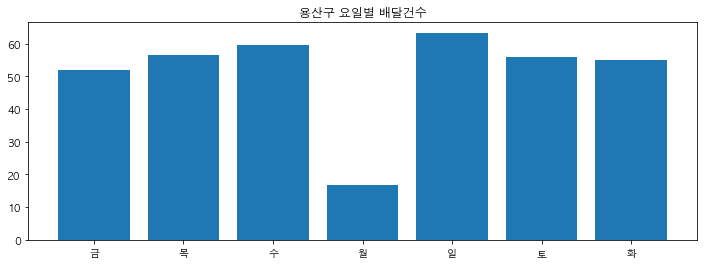

In [27]:
freq_by_day = freq_by_day.groupby('요일').mean().reset_index()
freq_by_day
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(freq_by_day['요일'], freq_by_day['배달건수'])
ax.set_title('용산구 요일별 배달건수')

Text(0.5, 1.0, '강남구 요일별 배달건수')

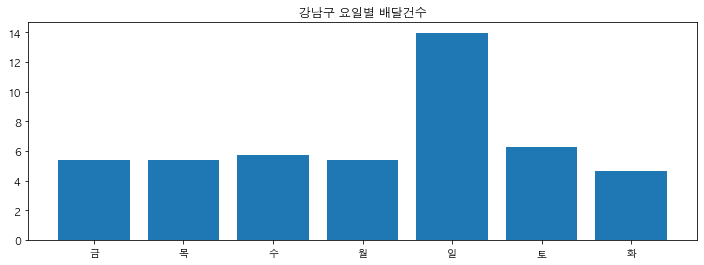

In [49]:
# 강남구 요일별 배달건수
test_frq_day = df[df['시군구']=='강남구'].groupby('요일').mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(test_frq_day['요일'], test_frq_day['배달건수'])
ax.set_title('강남구 요일별 배달건수')

Text(0.5, 1.0, '고양시 일산동구 요일별 배달건수')

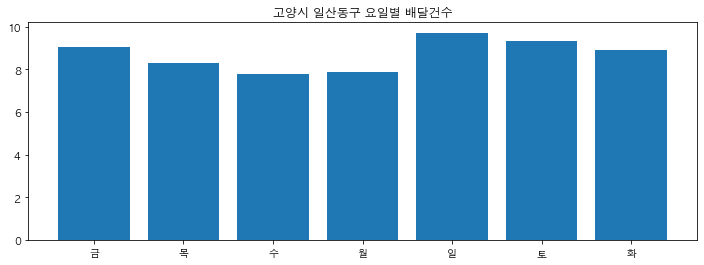

In [50]:
# 고양시 일산동구 배달건수 - Mean
test_frq_day = df[df['시군구']=='고양시 일산동구'].groupby('요일').mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(test_frq_day['요일'], test_frq_day['배달건수'])
ax.set_title('고양시 일산동구 요일별 배달건수')

Text(0.5, 1.0, '고양시 일산동구 요일별 배달건수')

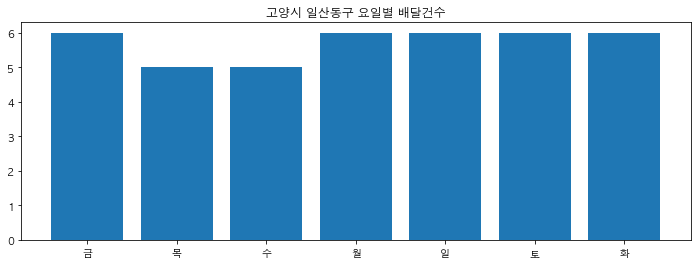

In [51]:
# 고양시 일산동구 배달건수 - Median
test_frq_day = df[df['시군구']=='고양시 일산동구'].groupby('요일').median().reset_index()
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(test_frq_day['요일'], test_frq_day['배달건수'])
ax.set_title('고양시 일산동구 요일별 배달건수')
ax.set_xticks([test_frq_day])

## 휴일별 배달건수 확인하기


In [46]:
# 비교해서 볼 수 있게, 휴일이 아닌 날도 들어가야하니까 nan값을 채워줘야겠음
df['day_name'] = df['day_name'].fillna('휴일아님')
df['holiday'] = df['holiday'].fillna('N')
df.head(10)

,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,day_name,holiday
0,2019-08-01,0,강원도,속초시,교동,1,목,휴일아님,N
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4,목,휴일아님,N
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28,목,휴일아님,N
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3,목,휴일아님,N
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4,목,휴일아님,N
5,2019-08-01,0,경기도,고양시 일산동구,정발산동,2,목,휴일아님,N
6,2019-08-01,0,경기도,고양시 일산서구,일산동,7,목,휴일아님,N
7,2019-08-01,0,경기도,고양시 일산서구,탄현동,3,목,휴일아님,N
8,2019-08-01,0,경기도,광명시,광명동,9,목,휴일아님,N
9,2019-08-01,0,경기도,광명시,철산동,13,목,휴일아님,N


In [50]:
# day_name에 '휴일아님'이 들어있고, 요일이 '토'&'일'이면 day_name값을 '주말'로 바꾸기

df.loc[(df['day_name']=='휴일아님')&((df['요일']!='토')|(df['요일']!='일')), 'day_name'] = '평일'
df

,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,day_name,holiday
0,2019-08-01,0,강원도,속초시,교동,1,목,평일,N
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4,목,평일,N
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28,목,평일,N
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3,목,평일,N
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4,목,평일,N
...,...,...,...,...,...,...,...,...,...
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6,화,평일,N
2382977,2021-08-31,23,충청북도,제천시,신백동,6,화,평일,N
2382978,2021-08-31,23,충청북도,제천시,신월동,2,화,평일,N
2382979,2021-08-31,23,충청북도,제천시,천남동,1,화,평일,N


In [64]:
df.to_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/rawdata/holiday/freq_with_holiday.csv')

In [61]:
freq_by_holiday = df[df['시군구']=='용산구'].groupby(['날짜', 'day_name']).sum().reset_index()
freq_by_holiday

,날짜,day_name,시간대,배달건수
0,2019-11-01,평일,9,1
1,2020-08-11,평일,20,1
2,2020-08-12,평일,136,48
3,2020-08-13,평일,120,31
4,2020-08-14,평일,154,49
...,...,...,...,...
245,2021-08-23,평일,20,1
246,2021-08-24,평일,12,1
247,2021-08-27,평일,10,1
248,2021-08-28,평일,33,2


Text(0.5, 1.0, '용산구 요일별 배달건수')

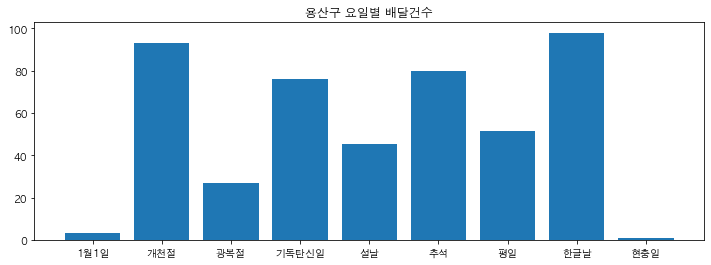

In [62]:
freq_by_holiday = freq_by_holiday.groupby('day_name').mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(freq_by_holiday['day_name'], freq_by_holiday['배달건수'])
ax.set_title('용산구 공휴일 일평균 배달건수')

# 평일은 빼주기

Text(0.5, 1.0, '서울특별시 용산구 휴일별 배달건수')

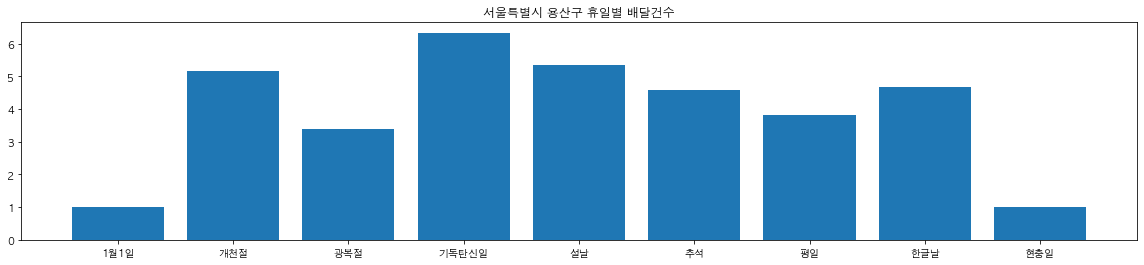

In [49]:
# 용산구에서, 각 공휴일 하루동안 발생하는 배달건수의 평균을 보여주기
freq_by_holiday = df[df['시군구']=='용산구'].groupby('day_name').

freq_by_holiday = df[df['시군구']=='용산구'].groupby('day_name').mean().reset_index()
fig, ax = plt.subplots(figsize=(20, 4))
ax.bar(freq_by_holiday['day_name'], freq_by_holiday['배달건수'])
ax.set_title('서울특별시 용산구 휴일별 배달건수')

### 공휴일 정보에서 휴일이 아닌 날을 기준으로 배달이 많았던 날과 배달이 적었던 날을 가려보고 차이가 왜 생겼는지 확인 필요할듯....


In [61]:
df.광역시도.nunique()

17

In [4]:
df = pd.read_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/rawdata/holiday/freq_with_holiday.csv', index_col=0)
df

/Users/seulalee/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/seulalee/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,day_name,holiday
0,2019-08-01,0,강원도,속초시,교동,1,목,NaN,NaN
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4,목,NaN,NaN
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28,목,NaN,NaN
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3,목,NaN,NaN
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4,목,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6,화,NaN,NaN
2382977,2021-08-31,23,충청북도,제천시,신백동,6,화,NaN,NaN
2382978,2021-08-31,23,충청북도,제천시,신월동,2,화,NaN,NaN
2382979,2021-08-31,23,충청북도,제천시,천남동,1,화,NaN,NaN


- 마스킹으로 null 값 제외하고 보고 싶을때는 등호 말고, isnull()/notnull() 쓰면 된다!!
- https://purplechip.tistory.com/5 none과 nan의 차이

In [12]:
df[df['day_name'].notnull()]

,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,day_name,holiday
32640,2019-08-15,0,강원도,속초시,교동,1,목,광복절,Y
32641,2019-08-15,0,경기도,고양시 덕양구,성사동,1,목,광복절,Y
32642,2019-08-15,0,경기도,고양시 덕양구,행신동,15,목,광복절,Y
32643,2019-08-15,0,경기도,고양시 덕양구,화정동,11,목,광복절,Y
32644,2019-08-15,0,경기도,고양시 일산동구,마두동,1,목,광복절,Y
...,...,...,...,...,...,...,...,...,...
2343769,2021-08-16,23,충청남도,천안시 서북구,쌍용동,5,월,대체공휴일,Y
2343770,2021-08-16,23,충청북도,제천시,신백동,3,월,대체공휴일,Y
2343771,2021-08-16,23,충청북도,제천시,천남동,3,월,대체공휴일,Y
2343772,2021-08-16,23,충청북도,제천시,청전동,5,월,대체공휴일,Y


In [18]:
null_replace = {'day_name':'N', 'holiday':'N'}
df = df.fillna(null_replace)

In [28]:
df[df['holiday']== 'Y'].groupby('day_name').count()

,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,holiday
day_name,,,,,,,,
1월1일,6582,6582,6582,6582,6582,6582,6582,6582
개천절,6619,6619,6619,6619,6619,6619,6619,6619
광복절,9319,9319,9319,9319,9319,9319,9319,9319
기독탄신일,7449,7449,7449,7449,7449,7449,7449,7449
대체공휴일,2676,2676,2676,2676,2676,2676,2676,2676
부처님오신날,6084,6084,6084,6084,6084,6084,6084,6084
삼일절,7504,7504,7504,7504,7504,7504,7504,7504
설날,19415,19415,19415,19415,19415,19415,19415,19415
어린이날,6554,6554,6554,6554,6554,6554,6554,6554


## 결측값 없이 다 메꾼 df 일단 저장해두기

In [29]:
df.to_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/cleaned_data/freq_with_holiday.csv')

## 두 개 지역 그래프 같이 그려서 비교하기

/Users/seulalee/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seulalee/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


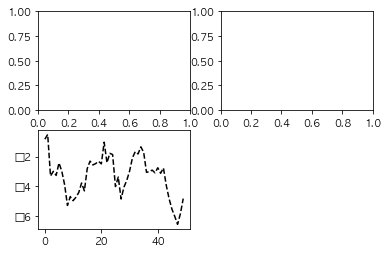

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)   # figure가 2x2 이고 4개의 서브플랏 중 첫 번재를 선택
ax2 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
# plt.plot([1.5, 3.5, -2, 1.6]) # plt.plot으로 그래프를 띄우면 가장 최근의 figure와 그 서브플롯을 그림. 서브플롯이 없으면 서브플롯 하나를 생성함
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [ ]:
# 우선 [1-2]요일별 그래프를 하루 평균으로

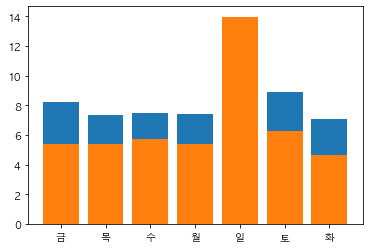

In [37]:
compare_plot1 = df[df['시군구']=='영등포구'].groupby('요일').mean().reset_index()
compare_plot2 = df[df['시군구']=='강남구'].groupby('요일').mean().reset_index()

fig, axes = plt.subplots(2, 1)
ax = fig.add_subplot(1, 1, 1)
ax.bar(compare_plot1['요일'], compare_plot1['배달건수'])
ax.bar(compare_plot2['요일'], compare_plot2['배달건수'])
plt.show()

In [38]:
compare_plot1

,요일,시간대,배달건수
0,금,15.096626,8.241964
1,목,14.971966,7.330360
2,수,15.275653,7.472564
3,월,14.934245,7.428996
4,일,14.898358,9.963296
5,토,14.974150,8.892026
6,화,14.884327,7.057247
